<a href="https://colab.research.google.com/github/Marco-Barraza/Proyectos-Coursera/blob/main/online_retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products.

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Prerequisites

Before starting this project, you should have some basic knowledge of Python programming and Pandas. In addition, you may want to use the following packages in your Python environment:

- pandas
- numpy
- seaborn
- matplotlib

These packages should already be installed in Coursera's Jupyter Notebook environment, however if you'd like to install additional packages that are not included in this environment or are working off platform you can install additional packages using `!pip install packagename` within a notebook cell such as:

- `!pip install pandas`
- `!pip install matplotlib`

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

## Task 1: Load the Data

In [ ]:
#importar primeras librerias.
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [ ]:
#cargar el dataset y se define una columna como indice.
df = pd.read_excel("/home/jovyan/work/Online Retail.xlsx", index_col="InvoiceDate")

In [ ]:
#se explora la primera y ultima fila para corroborar datos.
df.head(1)

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
InvoiceDate,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom


In [ ]:
df.tail(1)

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
InvoiceDate,,,,,,,
2011-12-09 12:50:00,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,4.95,12680.0,France


In [ ]:
#exploración preliminar
df.describe().round(1)

,Quantity,UnitPrice,CustomerID
count,541909.0,541909.0,406829.0
mean,9.6,4.6,15287.7
std,218.1,96.8,1713.6
min,-80995.0,-11062.1,12346.0
25%,1.0,1.2,13953.0
50%,3.0,2.1,15152.0
75%,10.0,4.1,16791.0
max,80995.0,38970.0,18287.0


Hay valores atípicos en las columnas cantidad y precio por unidad.

In [ ]:
#se exploran valores nulos
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Hay valores perdidos en las columnas descripción de productos e indicador de cliente.

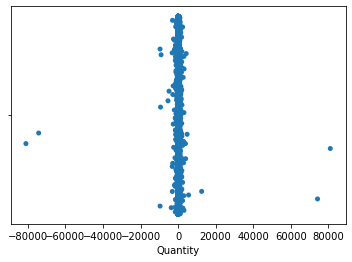

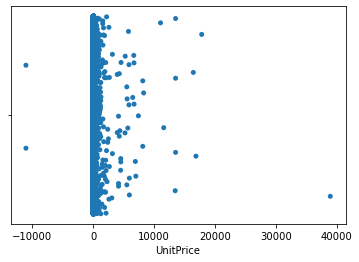

In [ ]:
#visualización de datos atipicos
sb.stripplot(x="Quantity", data=df)
plt.show()
sb.stripplot(x="UnitPrice", data=df)
plt.show()

In [ ]:
# Identificar valores atípicos utilizando el rango intercuartílico
Q1 = df['Quantity'].quantile(0.25)
Q3 = df['Quantity'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Corregir valores atípicos estableciéndolos como NaN
df.loc[(df['Quantity'] < lower_bound) | (df['Quantity'] > upper_bound), 'Quantity'] = np.nan
df.loc[(df["Quantity"] < 0), "Quantity"] = np.nan

In [ ]:
# Identificar valores atípicos utilizando el rango intercuartílico
Q1 = df['UnitPrice'].quantile(0.25)
Q3 = df['UnitPrice'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Corregir valores atípicos estableciéndolos como NaN
df.loc[(df['UnitPrice'] < lower_bound) | (df['UnitPrice'] > upper_bound), 'UnitPrice'] = np.nan

In [ ]:
# Porcetanje de valores peridod con respecto al total
# Total de valores en columna
total_valores = df.shape[0]

# Calcular la cantidad de valores perdidos en cada columna
valores_perdidos_por_columna = df.isnull().sum()

# Calcular el porcentaje de valores perdidos en cada columna
porcentaje_valores_perdidos_por_columna = (valores_perdidos_por_columna / total_valores) * 100

# Mostrar los porcentajes de valores perdidos por columna
print("Porcentaje de valores perdidos por columna:")
print(porcentaje_valores_perdidos_por_columna)

Porcentaje de valores perdidos por columna:
InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity       12.411493
UnitPrice       7.312482
CustomerID     24.926694
Country         0.000000
dtype: float64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 541909 entries, 2010-12-01 08:26:00 to 2011-12-09 12:50:00
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     474650 non-null  float64
 4   UnitPrice    502282 non-null  float64
 5   CustomerID   406829 non-null  float64
 6   Country      541909 non-null  object 
dtypes: float64(3), object(4)
memory usage: 33.1+ MB


In [ ]:
#Se imputa la moda en la columna Description
mode = df["Description"].mode()
df["Description"].fillna(mode[0], inplace=True)

In [ ]:
#Se imputa la moda en las columnas Quantity y UnitPrice
df["Quantity"].fillna(df["Quantity"].median(skipna=True), inplace=True)
df["UnitPrice"].fillna(df["UnitPrice"].median(skipna=True), inplace=True)
# Eliminar valores NaN de columna CustomerID
df.dropna(subset=["CustomerID"], inplace=True)

In [ ]:
#Se eliminan columnas redundantes
df.drop(columns=["InvoiceNo", "StockCode"], axis=1, inplace=True)

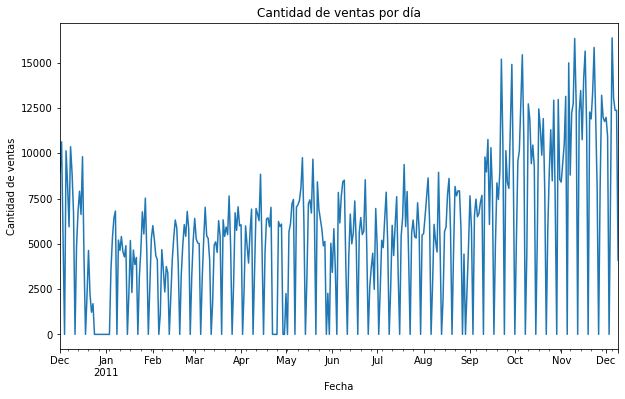

In [ ]:
# Trama de la cantidad de ventas a lo largo del tiempo
plt.figure(figsize=(10, 6))
df['Quantity'].resample('D').sum().plot()
plt.title('Cantidad de ventas por día')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de ventas')
plt.show()

Productos más populares:
 WHITE HANGING HEART T-LIGHT HOLDER    2070
REGENCY CAKESTAND 3 TIER              1905
JUMBO BAG RED RETROSPOT               1662
ASSORTED COLOUR BIRD ORNAMENT         1418
PARTY BUNTING                         1416
Name: Description, dtype: int64

Distribución de países de los clientes:
 United Kingdom    361878
Germany             9495
France              8491
EIRE                7485
Spain               2533
Name: Country, dtype: int64


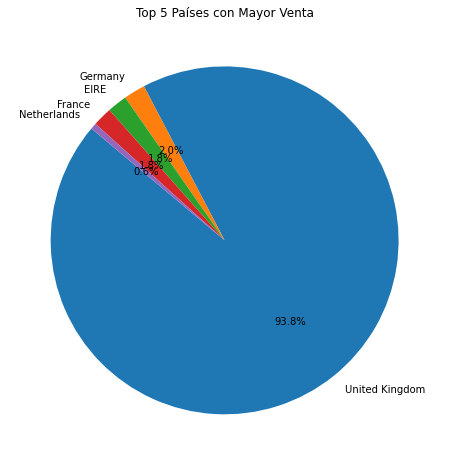

In [ ]:
# Distribución de los productos más populares
top_products = df['Description'].value_counts().head(5)
print("Productos más populares:\n", top_products)

# Distribución de los países de los clientes
customer_countries = df['Country'].value_counts().head(5)
print("\nDistribución de países de los clientes:\n", customer_countries)

# Calcular el total de ventas por país
sales_by_country = df.groupby('Country')['CustomerID'].sum().sort_values(ascending=False).head(5)

# Gráfico circular
plt.figure(figsize=(8, 8))
plt.pie(sales_by_country, labels=sales_by_country.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Países con Mayor Venta')
plt.show()

Estadísticas descriptivas para 'Quantity':
 count    406829.000000
mean          5.186653
std           4.345676
min           1.000000
25%           2.000000
50%           3.000000
75%           8.000000
max          23.000000
Name: Quantity, dtype: float64

Estadísticas descriptivas para 'UnitPrice':
 count    406829.000000
mean          2.304311
std           1.775689
min           0.000000
25%           1.250000
50%           1.950000
75%           2.950000
max           8.290000
Name: UnitPrice, dtype: float64


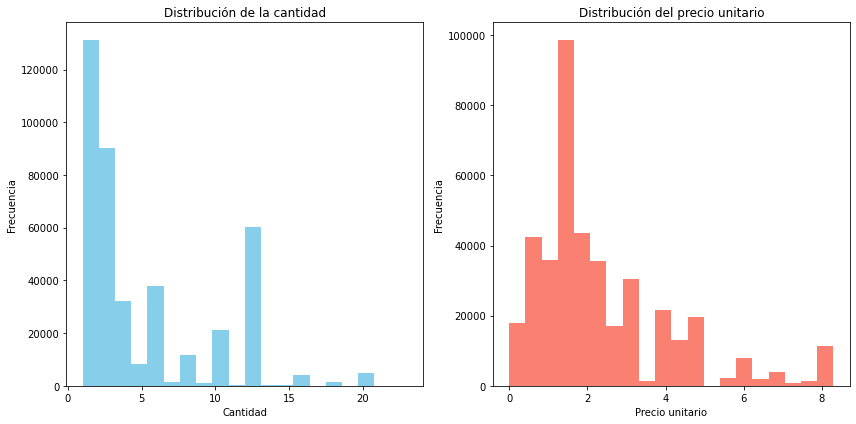

In [ ]:
# Estadísticas descriptivas
print("Estadísticas descriptivas para 'Quantity':\n", df['Quantity'].describe())
print("\nEstadísticas descriptivas para 'UnitPrice':\n", df['UnitPrice'].describe())

# Histogramas
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df['Quantity'], bins=20, color='skyblue')
plt.title('Distribución de la cantidad')
plt.xlabel('Cantidad')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
plt.hist(df['UnitPrice'], bins=20, color='salmon')
plt.title('Distribución del precio unitario')
plt.xlabel('Precio unitario')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

Estadísticas descriptivas para 'Ventas totales':
 count    406829.000000
mean         10.417601
std          11.079035
min           0.000000
25%           2.900000
50%           6.640000
75%          15.000000
max         168.300000
Name: Ventas totales, dtype: float64


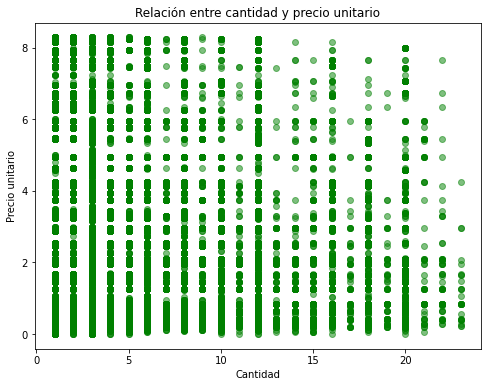

In [ ]:
# Calcular el total de ventas por transacción
df['Ventas totales'] = df['Quantity'] * df['UnitPrice']

# Estadísticas descriptivas para el total de ventas
print("Estadísticas descriptivas para 'Ventas totales':\n", df['Ventas totales'].describe())

# Diagrama de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(df['Quantity'], df['UnitPrice'], color='green', alpha=0.5)
plt.title('Relación entre cantidad y precio unitario')
plt.xlabel('Cantidad')
plt.ylabel('Precio unitario')
plt.show()

In [ ]:
# Total de ventas por cliente
sales_by_customer = df.groupby('CustomerID')['Ventas totales'].sum().sort_values(ascending=False)
print("Total de ventas por cliente:\n", sales_by_customer.head(5))

# Clientes más frecuentes
frequent_customers = df['CustomerID'].value_counts().head(5)
print("\nClientes más frecuentes:\n", frequent_customers)

# Clientes que generan más ingresos
top_customers_by_revenue = df.groupby('CustomerID')['Ventas totales'].sum().sort_values(ascending=False).head(5)
print("\nClientes que generan más ingresos:\n", top_customers_by_revenue)

Total de ventas por cliente:
 CustomerID
14911.0    83815.77
14096.0    40228.42
17841.0    33791.32
13089.0    30183.66
12748.0    20797.42
Name: Ventas totales, dtype: float64

Clientes más frecuentes:
 17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
Name: CustomerID, dtype: int64

Clientes que generan más ingresos:
 CustomerID
14911.0    83815.77
14096.0    40228.42
17841.0    33791.32
13089.0    30183.66
12748.0    20797.42
Name: Ventas totales, dtype: float64


In [ ]:
#Se filtran los datos por el sub grupo United Kingdom
UK = df[df['Country'] == 'United Kingdom'].copy()

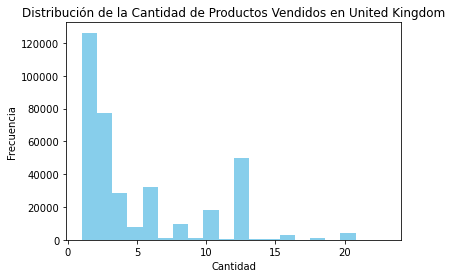

In [ ]:
#Histograma de la cantidad de productos vendidos
plt.hist(UK['Quantity'], bins=20, color='skyblue')
plt.title('Distribución de la Cantidad de Productos Vendidos en United Kingdom')
plt.xlabel('Cantidad')
plt.ylabel('Frecuencia')
plt.show()

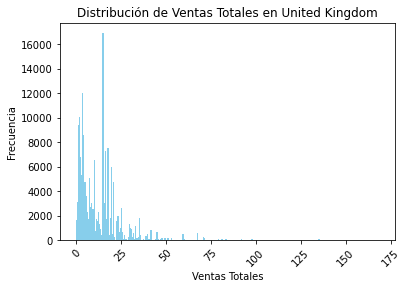

In [ ]:
# Gráfico de barras de la distribución de ventas totales
ventas_totales_distribution = UK['Ventas totales'].value_counts().sort_index()

plt.bar(ventas_totales_distribution.index, ventas_totales_distribution.values, color='skyblue')
plt.title('Distribución de Ventas Totales en United Kingdom')
plt.xlabel('Ventas Totales')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

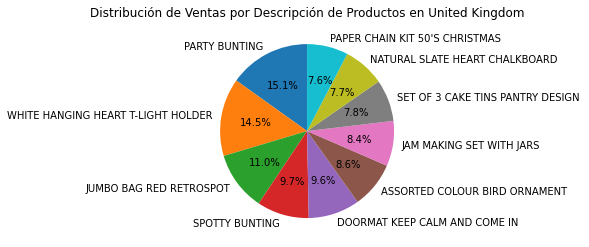

In [ ]:
#Gráfico de torta de distribución de ventas por descripción de producto
sales_by_description = UK.groupby('Description')['Ventas totales'].sum().sort_values(ascending=False).head(10)
sales_by_description.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribución de Ventas por Descripción de Productos en United Kingdom')
plt.ylabel('')
plt.show()

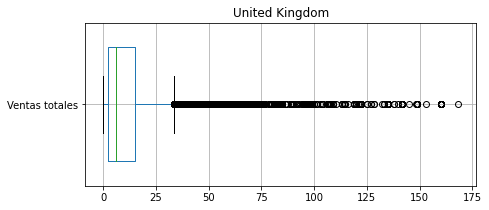

In [ ]:
# Gráfico de caja de ventas totales por país (horizontal)
plt.figure(figsize=(7, 3))
UK.boxplot(column='Ventas totales', vert=False, widths=0.7)
plt.title('United Kingdom')
plt.show()

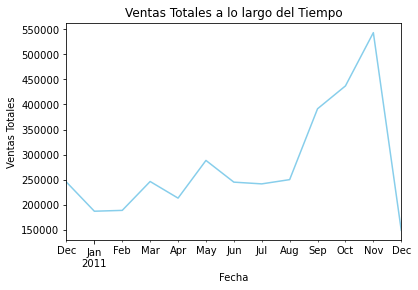

In [ ]:
#Gráfico de línea de ventas totales a lo largo del tiempo
UK.resample('M').sum()['Ventas totales'].plot(kind='line', color='skyblue')
plt.title('Ventas Totales a lo largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Ventas Totales')
plt.show()

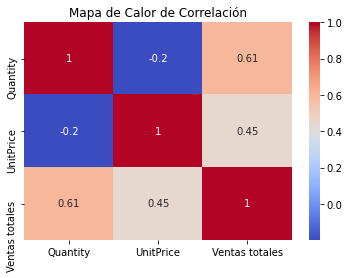

In [ ]:
corr_matrix = UK[['Quantity', 'UnitPrice', 'Ventas totales']].corr()
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlación')
plt.show()

In [ ]:
UK.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 361878 entries, 2010-12-01 08:26:00 to 2011-12-09 12:49:00
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Description     361878 non-null  object 
 1   Quantity        361878 non-null  float64
 2   UnitPrice       361878 non-null  float64
 3   CustomerID      361878 non-null  float64
 4   Country         361878 non-null  object 
 5   Ventas totales  361878 non-null  float64
dtypes: float64(4), object(2)
memory usage: 19.3+ MB


Recomedación: Basándonos en los análisis realizados, se observa que el mercado del Reino Unido es fundamental para el negocio, con ventas más altas al principio del mes y al final del año. La fuerte asimetría izquierda en los datos sugiere que hay una concentración en productos de bajo valor. Para mejorar el análisis, se recomienda recopilar información adicional, como edad, género, estado civil y ciudad de la tienda, así como una categorización de productos por sección. Estos datos podrían ayudar a crear perfiles más detallados de los clientes y a comprender mejor sus preferencias y comportamientos de compra.
En consecuencia, se sugiere implementar estrategias específicas para aprovechar el mercado del Reino Unido, como promociones especiales al comienzo de cada mes y durante la temporada navideña. Además, se debe considerar diversificar el inventario para satisfacer las necesidades y preferencias de los clientes de manera más efectiva. La recopilación de datos demográficos y geográficos adicionales permitirá una segmentación más precisa del mercado y la personalización de las ofertas y promociones. Esto podría conducir a una mejora significativa en la experiencia del cliente y, en última instancia, a un aumento en las ventas y la rentabilidad del negocio.